<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset

In [66]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00472/caesarian.csv.arff

--2019-09-27 06:48:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00472/caesarian.csv.arff
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1437 (1.4K) [application/x-httpd-php]
Saving to: ‘caesarian.csv.arff.1’

caesarian.csv.arff. 100%[===================>]   1.40K  --.-KB/s    in 0s      

2019-09-27 06:48:23 (78.8 MB/s) - ‘caesarian.csv.arff.1’ saved [1437/1437]



In [3]:
!head caesarian.csv.arff

@relation caesarian




@attribute 'Age' { 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38 } 
@attribute 'Delivery number' { 1,2,3,4 }
@attribute 'Delivery time' { 0,1,2 }
@attribute 'Blood of Pressure' { 2,1,0 }



In [4]:
!tail caesarian.csv.arff

17,1,0,0,0,1
29,1,2,0,1,1
28,2,0,1,0,0
32,3,0,1,1,0
38,3,2,2,1,1
27,2,1,1,0,0
33,4,0,1,0,1
29,2,1,2,0,1
25,1,2,0,0,1
24,2,2,1,0,0


In [67]:
# Loading dataset
column_headers = ['Age', 'Delivery number', 'Delivery time',
                'Blood Pressure', 'Heart Problem', 'Caesarian']
df = pd.read_csv('caesarian.csv.arff', header=7, names=column_headers )
print(df.shape)
df.head(10)

(80, 6)


,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
5,26,1,1,0,0,0
6,27,2,0,1,0,0
7,32,3,0,1,0,1
8,28,2,0,1,0,0
9,27,1,1,1,0,1


### This dataset contains information about caesarian section results of 80 pregnant women with the most important characteristics of delivery problems in the medical field.

Delivery time:Premature, Timely and Latecomer. Blood pressure: Low, Normal and High. 
Heart Problem: apt and inept.

- attribute 'Age' { 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38 }
- attribute 'Delivery number' { 1,2,3,4 }
- attribute 'Delivery time' { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer}
- attribute 'Blood of Pressure' { 2,1,0 } -> {0 = low , 1 = normal , 2 = high }
- attribute 'Heart Problem' { 1,0 } -> {0 = apt, 1 = inept }

- attribute Caesarian { 0,1 } -> {0 = No, 1 = Yes }

In [68]:
#replacing values on table

df['Delivery time'] = df['Delivery time'].replace({0:2, 2:3})
df.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,2,2,0,0
1,26,2,2,1,0,1
2,26,2,1,1,0,0
3,28,1,2,2,0,0
4,22,2,2,1,0,1


In [69]:
df['Blood Pressure'] = df['Blood Pressure'].replace({0:1, 1:2, 2:3})
df.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,2,3,0,0
1,26,2,2,2,0,1
2,26,2,1,2,0,0
3,28,1,2,3,0,0
4,22,2,2,2,0,1


In [70]:
df['Heart Problem'] = df['Heart Problem'].replace({0:1, 1:2})
df.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,2,3,1,0
1,26,2,2,2,1,1
2,26,2,1,2,1,0
3,28,1,2,3,1,0
4,22,2,2,2,1,1


In [71]:
df['Caesarian'] = df['Caesarian'].replace({0:1, 1:2})
df.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,2,3,1,1
1,26,2,2,2,1,2
2,26,2,1,2,1,1
3,28,1,2,3,1,1
4,22,2,2,2,1,2


In [69]:
#  Looking for NaNs
df.isnull().sum()

Age                0
Delivery number    0
Delivery time      0
Blood Pressure     0
Heart Problem      0
Caesarian          0
dtype: int64

### Data exploration

In [10]:
# Looking for the most common values
df.mode()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,26,1,2,2,1,2


In [11]:
# Looking for mean of features
df.mean()

Age                27.6875
Delivery number     1.6625
Delivery time       2.0000
Blood Pressure      2.0000
Heart Problem       1.3750
Caesarian           1.5750
dtype: float64

In [73]:
df['Age'].value_counts()

26    10
32     8
27     7
25     7
29     6
28     6
33     5
22     4
31     3
36     3
20     3
30     3
21     2
35     2
19     2
18     2
24     2
40     1
23     1
38     1
37     1
17     1
Name: Age, dtype: int64

In [74]:
df['Delivery number'].value_counts()

1    41
2    27
3    10
4     2
Name: Delivery number, dtype: int64

In [75]:
df['Delivery time'].value_counts()

2    46
3    17
1    17
Name: Delivery time, dtype: int64

In [76]:
df['Blood Pressure'].value_counts()

2    40
3    20
1    20
Name: Blood Pressure, dtype: int64

In [77]:
df['Heart Problem'].value_counts()

1    50
2    30
Name: Heart Problem, dtype: int64

In [80]:
df['Caesarian'].value_counts()

2    46
1    34
Name: Caesarian, dtype: int64

### In this dataset:
Mean delivery age is 27.68 years

Mean Delivery number is between being the 1st or 2nd delivery, more inclined for 2nd

Blood pressure mean mostly normal

Part of the individuals with heart problems with a mean of 1.375 between 1 and 2

More than half of the pregnants had caesarian with a value of 1.575 between 1 and 2 

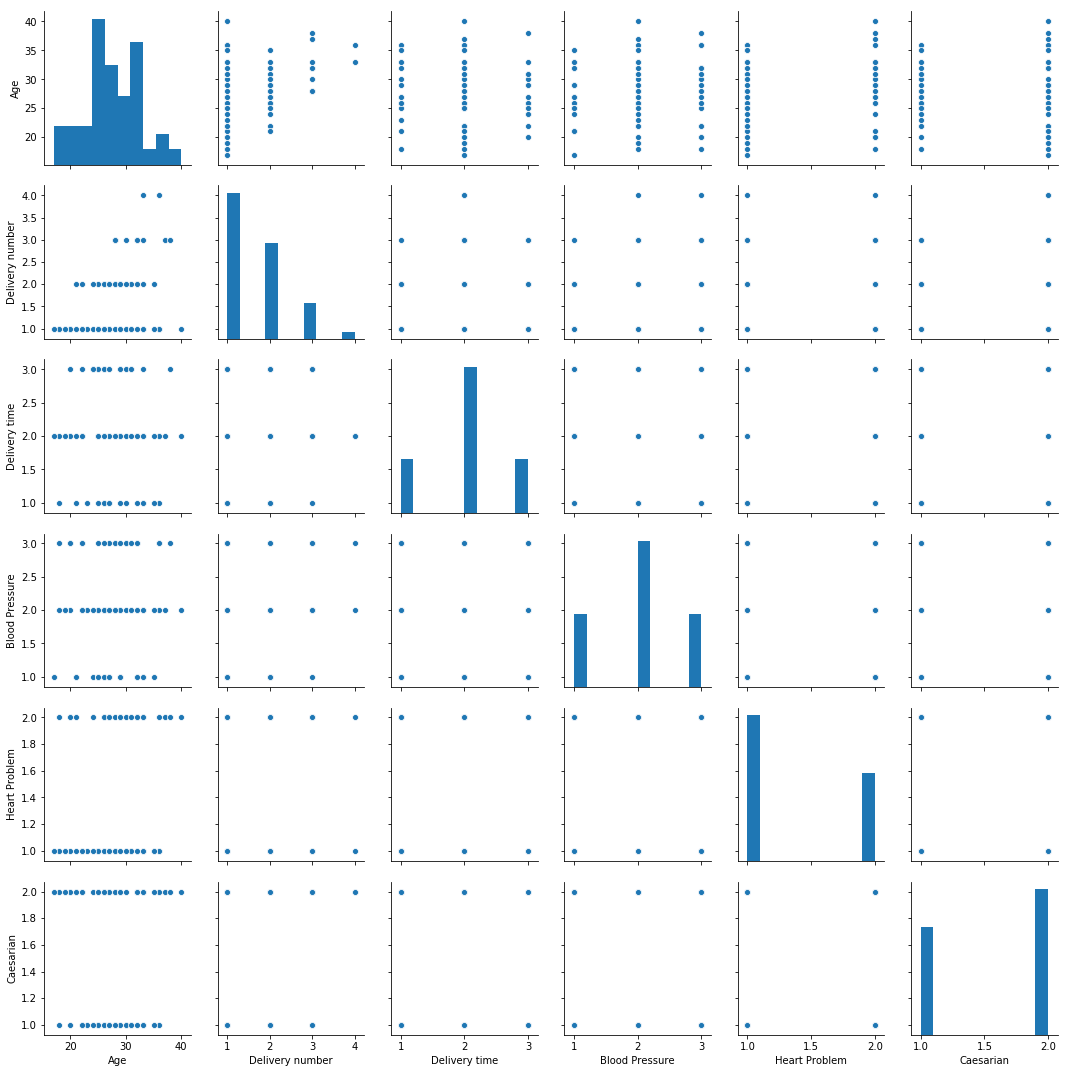

In [83]:
# Starting with a pairplot to eyeball corrlations and see histograms
ax = sns.pairplot(df)

In [0]:
# Splitting data in two datasets

caesarian = df[df['Caesarian'] == 2]
nocaesarian = df[df['Caesarian'] == 1]

In [91]:
print(caesarian.shape)
caesarian.head()

(46, 6)


,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
1,26,2,2,2,1,2
4,22,2,2,2,1,2
7,32,3,2,2,1,2
9,27,1,1,2,1,2
11,33,1,1,1,1,2


In [92]:
print(nocaesarian.shape)
nocaesarian.head()

(34, 6)


,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,2,3,1,1
2,26,2,1,2,1,1
3,28,1,2,3,1,1
5,26,1,1,1,1,1
6,27,2,2,2,1,1


In [13]:
caesarian.mean()

Age                28.021739
Delivery number     1.760870
Delivery time       2.000000
Blood Pressure      1.978261
Heart Problem       1.521739
Caesarian           2.000000
dtype: float64

In [14]:
nocaesarian.mean()

Age                27.235294
Delivery number     1.529412
Delivery time       2.000000
Blood Pressure      2.029412
Heart Problem       1.176471
Caesarian           1.000000
dtype: float64

In [100]:
stats.ttest_ind(caesarian['Age'], nocaesarian['Age'])

Ttest_indResult(statistic=0.6906772900100197, pvalue=0.4918186355849964)

In [73]:
cut_points = [0, 10, 20, 30, 40]
label_names = ['0-10', '11-20', '21-30', '31-40']
df['Age_cat'] = pd.cut(df['Age'], cut_points, labels=label_names)

df.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian,Age_cat
0,22,1,2,3,1,1,21-30
1,26,2,2,2,1,2,21-30
2,26,2,1,2,1,1,21-30
3,28,1,2,3,1,1,21-30
4,22,2,2,2,1,2,21-30


In [74]:
df = df.sort_values(by='Age_cat', ascending=True)

df.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian,Age_cat
25,18,1,2,2,1,1,11-20
13,20,1,2,2,2,1,11-20
61,19,1,2,2,1,2,11-20
24,20,1,2,3,2,2,11-20
26,18,1,1,3,2,2,11-20


In [75]:
contingency_table6 = pd.crosstab(df['Caesarian'], df['Age_cat'], margins=True)

contingency_table6

Age_cat,11-20,21-30,31-40,All
Caesarian,,,,
1,2,24,8,34
2,6,24,16,46
All,8,48,24,80


In [76]:
caesarian_agecount = contingency_table6.iloc[1][0:3].values
caesarian_agecount

array([ 6, 24, 16])

In [77]:
nocaesarian_agecount = contingency_table6.iloc[0][0:3].values
nocaesarian_agecount

array([ 2, 24,  8])

In [23]:
row_sumsCA = contingency_table6.iloc[0:2, 3].values
col_sumsCA = contingency_table6.iloc[2, 0:3].values

print(row_sumsCA)
print(col_sumsCA)

[34 46]
[ 8 48 24]


In [24]:
total = contingency_table6.loc['All','All']
total

80

In [25]:
expected = []
for i in range(len(row_sumsCA)):
  expected_row = []
  for column in col_sumsCA:
    expected_val = column*row_sumsCA[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 3)
[[ 3.4 20.4 10.2]
 [ 4.6 27.6 13.8]]


In [26]:
observed = pd.crosstab(df['Caesarian'], df['Age_cat']).values
print(observed.shape)
observed

(2, 3)


array([[ 2, 24,  8],
       [ 6, 24, 16]])

In [27]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2.932651321398125
P-value: 0.23077186342140849
Degrees of Freedom: 2
Expected: 
 [[ 3.4 20.4 10.2]
 [ 4.6 27.6 13.8]]


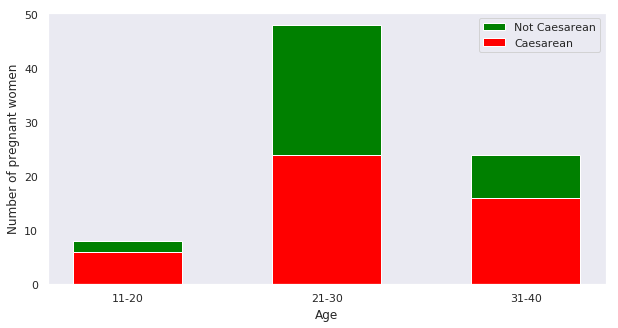

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
categories = ["11-20", "21-30", "31-40"]
p1 = plt.bar(categories, caesarian_agecount, 0.55, color='red')
p2 = plt.bar(categories, nocaesarian_agecount, 0.55, bottom=caesarian_agecount, color='green')
plt.legend((p2[0], p1[0]), ('Not Caesarean', 'Caesarean'))
plt.xlabel('Age')
plt.ylabel('Number of pregnant women')
plt.grid(False)
plt.savefig('age.png', facecolor=fig.get_facecolor(),transparent=True)
plt.show()

In [0]:
### It is very likely these two features are independent as p-value is around 0.23 and the chi squared value is not very significant. Observed values are close to expected values. 

In [29]:
contingency_table4 = pd.crosstab(df['Caesarian'], df['Blood Pressure'], margins=True)

contingency_table4

Blood Pressure,1,2,3,All
Caesarian,,,,
1,5,23,6,34
2,15,17,14,46
All,20,40,20,80


In [30]:
caesarian_bpcount = contingency_table4.iloc[1][0:3].values
caesarian_bpcount

array([15, 17, 14])

In [31]:
nocaesarian_bpcount = contingency_table4.iloc[0][0:3].values
nocaesarian_bpcount

array([ 5, 23,  6])

In [38]:
row_sumsBP = contingency_table4.iloc[0:2, 3].values
col_sumsBP = contingency_table4.iloc[2, 0:3].values

print(row_sumsBP)
print(col_sumsBP)

[34 46]
[20 40 20]


In [33]:
total = contingency_table4.loc['All','All']
total

80

In [35]:
expected = []
for i in range(len(row_sumsBP)):
  expected_row = []
  for column in col_sumsBP:
    expected_val = column*row_sumsBP[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 3)
[[ 8.5 17.   8.5]
 [11.5 23.  11.5]]


In [36]:
observed = pd.crosstab(df['Caesarian'], df['Blood Pressure']).values
print(observed.shape)
observed

(2, 3)


array([[ 5, 23,  6],
       [15, 17, 14]])

In [37]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 7.468030690537084
P-value: 0.02389668947645031
Degrees of Freedom: 2
Expected: 
 [[ 8.5 17.   8.5]
 [11.5 23.  11.5]]


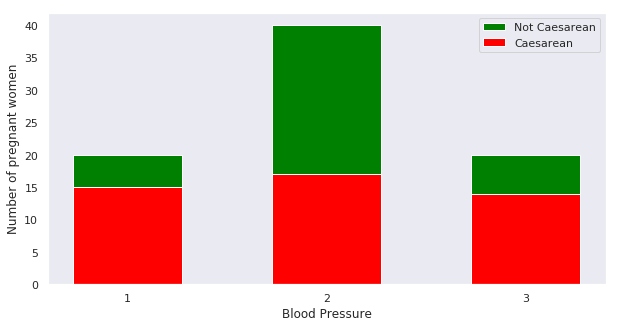

In [103]:
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
categories = ["1", "2", "3"]
p1 = plt.bar(categories, caesarian_bpcount, 0.55, color='red')
p2 = plt.bar(categories, nocaesarian_bpcount, 0.55, bottom=caesarian_bpcount, color='green')
plt.legend((p2[0], p1[0]), ('Not Caesarean', 'Caesarean'))
plt.xlabel('Blood Pressure')  
plt.ylabel('Number of pregnant women')
plt.grid(False)
plt.savefig('blood_pressure.png', facecolor=fig.get_facecolor(),transparent=True)
plt.show()

In [0]:
### There is a moderate strong evidence of dependence between the two variables. p-value is around 0.023 and the chi squared value is not very significant. Observed values are lower than expected. 

In [40]:
contingency_table5 = pd.crosstab(df['Caesarian'], df['Heart Problem'], margins=True)

contingency_table5

Heart Problem,1,2,All
Caesarian,,,
1,28,6,34
2,22,24,46
All,50,30,80


In [41]:
caesarian_hpcount = contingency_table5.iloc[1][0:2].values
caesarian_hpcount

array([22, 24])

In [42]:
nocaesarian_hpcount = contingency_table5.iloc[0][0:2].values
nocaesarian_hpcount

array([28,  6])

In [44]:
row_sumsHP = contingency_table5.iloc[0:2, 2].values
col_sumsHP = contingency_table5.iloc[2, 0:2].values

print(row_sumsHP)
print(col_sumsHP)

[34 46]
[50 30]


In [43]:
total = contingency_table5.loc['All','All']
total

80

In [45]:
expected = []
for i in range(len(row_sumsHP)):
  expected_row = []
  for column in col_sumsHP:
    expected_val = column*row_sumsHP[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 2)
[[21.25 12.75]
 [28.75 17.25]]


In [46]:
observed = pd.crosstab(df['Caesarian'], df['Heart Problem']).values
print(observed.shape)
observed

(2, 2)


array([[28,  6],
       [22, 24]])

In [47]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 8.525149190110827
P-value: 0.0035027203582469724
Degrees of Freedom: 1
Expected: 
 [[21.25 12.75]
 [28.75 17.25]]


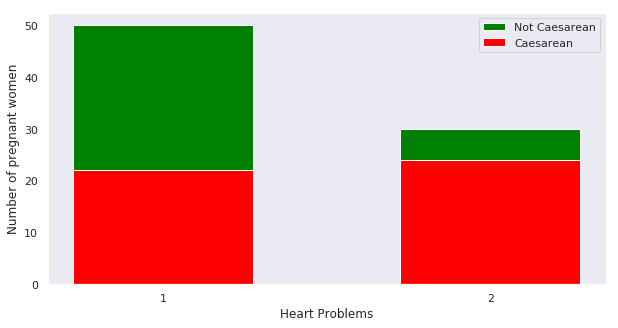

In [104]:
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
categories = ["1", "2"]
p1 = plt.bar(categories, caesarian_hpcount, 0.55, color='red')
p2 = plt.bar(categories, nocaesarian_hpcount, 0.55, bottom=caesarian_hpcount, color='green')
plt.legend((p2[0], p1[0]), ('Not Caesarean', 'Caesarean'))
plt.xlabel('Heart Problems')
plt.ylabel('Number of pregnant women')
plt.grid(False)
plt.savefig('Heart_problems.png', facecolor=fig.get_facecolor(),transparent=True)
plt.show()

In [0]:
### It is very likely these two features are dependent as p-value is low, around 0.003, and the chi squared value is relatively significant. Observed values are not too close to expected values. 

In [106]:
contingency_table3 = pd.crosstab(df['Caesarian'], df['Delivery time'], margins=True)

contingency_table3

Delivery time,1,2,3,All
Caesarian,,,,
1,9,16,9,34
2,8,30,8,46
All,17,46,17,80


In [107]:
caesarian_dtcount = contingency_table3.iloc[1][0:3].values
caesarian_dtcount

array([ 8, 30,  8])

In [108]:
nocaesarian_dtcount = contingency_table3.iloc[0][0:3].values
nocaesarian_dtcount

array([ 9, 16,  9])

In [51]:
row_sumsDT = contingency_table3.iloc[0:2, 3].values
col_sumsDT = contingency_table3.iloc[2, 0:3].values

print(row_sumsDT)
print(col_sumsDT)

[34 46]
[17 46 17]


In [52]:
total = contingency_table3.loc['All','All']
total

80

In [53]:
expected = []
for i in range(len(row_sumsDT)):
  expected_row = []
  for column in col_sumsDT:
    expected_val = column*row_sumsDT[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 3)
[[ 7.225 19.55   7.225]
 [ 9.775 26.45   9.775]]


In [55]:
observed = pd.crosstab(df['Caesarian'], df['Delivery time']).values
print(observed.shape)
observed

(2, 3)


array([[ 9, 16,  9],
       [ 8, 30,  8]])

In [56]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2.637868669095572
P-value: 0.267420130567267
Degrees of Freedom: 2
Expected: 
 [[ 7.225 19.55   7.225]
 [ 9.775 26.45   9.775]]


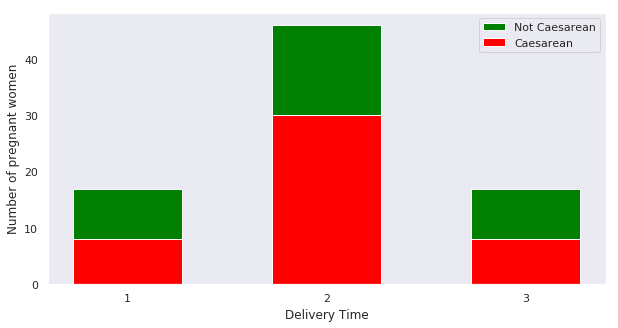

In [109]:
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
categories = ["1", "2", "3"]
p1 = plt.bar(categories, caesarian_dtcount, 0.55, color='red')
p2 = plt.bar(categories, nocaesarian_dtcount, 0.55, bottom=caesarian_dtcount, color='green')
plt.legend((p2[0], p1[0]), ('Not Caesarean', 'Caesarean'))
plt.xlabel('Delivery Time')
plt.ylabel('Number of pregnant women')
plt.grid(False)
plt.savefig('delivery_time.png', facecolor=fig.get_facecolor(),transparent=True)
plt.show()

In [0]:
### It is very likely these two features are independent as p-value is around 0.3 and the chi squared value is not very significant. Observed values are larger than expected but close values. 

In [111]:
contingency_table7 = pd.crosstab(df['Caesarian'], df['Delivery number'], margins=True)

contingency_table7

Delivery number,1,2,3,4,All
Caesarian,,,,,
1,19,12,3,0,34
2,22,15,7,2,46
All,41,27,10,2,80


In [112]:
caesarian_dncount = contingency_table7.iloc[1][0:4].values
caesarian_dncount

array([22, 15,  7,  2])

In [113]:
nocaesarian_dncount = contingency_table7.iloc[0][0:4].values
nocaesarian_dncount

array([19, 12,  3,  0])

In [60]:
row_sumsDN = contingency_table7.iloc[0:2, 4].values
col_sumsDN = contingency_table7.iloc[2, 0:4].values

print(row_sumsDN)
print(col_sumsDN)

[34 46]
[41 27 10  2]


In [61]:
total = contingency_table7.loc['All','All']
total

80

In [62]:
expected = []
for i in range(len(row_sumsDN)):
  expected_row = []
  for column in col_sumsDN:
    expected_val = column*row_sumsDN[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 4)
[[17.425 11.475  4.25   0.85 ]
 [23.575 15.525  5.75   1.15 ]]


In [63]:
observed = pd.crosstab(df['Caesarian'], df['Delivery number']).values
print(observed.shape)
observed

(2, 4)


array([[19, 12,  3,  0],
       [22, 15,  7,  2]])

In [64]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2.4070030981639743
P-value: 0.49233232957480877
Degrees of Freedom: 3
Expected: 
 [[17.425 11.475  4.25   0.85 ]
 [23.575 15.525  5.75   1.15 ]]


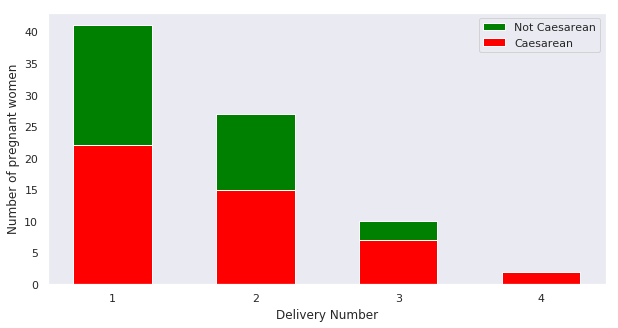

In [114]:
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
categories = ["1", "2", "3", "4"]
p1 = plt.bar(categories, caesarian_dncount, 0.55, color='red')
p2 = plt.bar(categories, nocaesarian_dncount, 0.55, bottom=caesarian_dncount, color='green')
plt.legend((p2[0], p1[0]), ('Not Caesarean', 'Caesarean'))
plt.xlabel('Delivery Number')
plt.ylabel('Number of pregnant women')
plt.grid(False)
plt.savefig('delivery_number.png', facecolor=fig.get_facecolor(),transparent=True)
plt.show()

In [0]:
### It is very likely these two features are independent as p-value is around 0.5 and the chi squared value is not very significant. Observed values are larger than expected but close values. 